In [16]:
import argopy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import numpy as np
import time
from datetime import datetime

In [ ]:
cnt = 0
while True:
    try:
        f = argopy.DataFetcher()
        f
        f = f.region([-180, 180, -90, 90, 0, 20, '2011-01', '2013-01'])
        f.data
        break
    except:
        cnt += 1

latitude_data = f.data['LATITUDE'].values
longitude_data = f.data['LONGITUDE'].values
pres_data = f.data['PRES'].values #Tried to use d.data here
temp_data = f.data['TEMP'].values
psal_data = f.data['PSAL'].values

df = pd.DataFrame({
    'Latitude': latitude_data,
    'Longitude': longitude_data,
    'depth': pres_data, #pressure represents depth
    'Temperature': temp_data,
    'Salinity': psal_data
})

print(df)
Var_Corr = df.corr()

# Set up the annotation parameters (font size, weight, and other properties)
annot_kws = {"size": 12, "weight": "bold"}

# Set up the color bar parameters (font size, weight, and other properties)
cbar_kws = {"shrink": 0.75, "ticks": np.arange(-1, 1.1, 0.2)}

# Plot the heatmap with correlation values in the center
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(Var_Corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, center=0, annot_kws=annot_kws, cbar_kws=cbar_kws)

# Set the x-axis and y-axis tick labels to bold
heatmap.set_xticklabels(heatmap.get_xticklabels(), weight="bold", size=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), weight="bold", size=12)

plt.title('Correlation Heatmap')
plt.show()

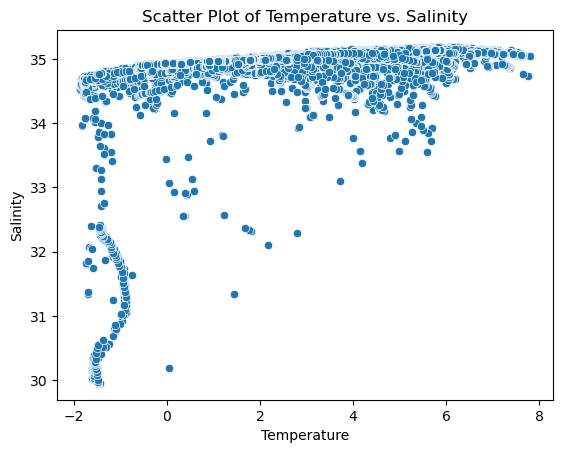

In [2]:
cnt = 0
while True:
    try:
        f = argopy.DataFetcher()
        f
        f = f.region([-180, 180, 75, 80, 0, 100, '2010-01', '2014-01'])
        f.data
        break
    except:
        cnt += 1

latitude_data = f.data['LATITUDE'].values
longitude_data = f.data['LONGITUDE'].values
pres_data = f.data['PRES'].values #Tried to use d.data here
temp_data = f.data['TEMP'].values
psal_data = f.data['PSAL'].values

df = pd.DataFrame({
    'Latitude': latitude_data,
    'Longitude': longitude_data,
    'depth': pres_data, #pressure represents depth
    'Temperature': temp_data,
    'Salinity': psal_data
})

sns.scatterplot(x='Temperature', y='Salinity', data=df)

plt.title('Scatter Plot of Temperature vs. Salinity')

plt.show()

False


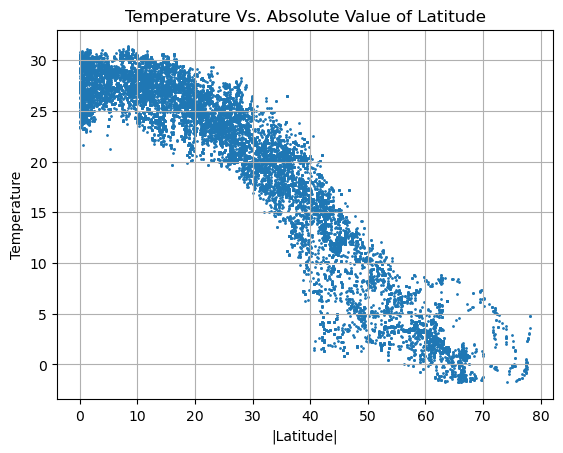

In [14]:
def plot_temp_vs_abs_latitude():
    try:
        df_raw = pd.read_csv('data.csv')
    except:
        print("Importing data...")
        t0 = time.time()
        ArgoSet = argopy.DataFetcher().region([-180, 180, -90, 90, 0, 5, '2015-01', '2015-02'])
        print("Time to import : ", time.time() - t0)
        ds = ArgoSet.data.argo.point2profile().to_dataframe()
        print("Time to get data from DataFetcher : ", time.time() - t0)
        ds.to_csv('data.csv')

    # Remove rows where temp is None
    df = df_raw.dropna(subset=['TEMP'])
    # Define the variables to work with:
    temp = np.array(df['TEMP'])
    lat = np.array(df['LATITUDE'])
    # Absolute value of latitudes
    abs_lat = np.abs(lat)

    # Scatter and grid
    plt.scatter(abs_lat, temp, s=1)
    plt.grid(True)

    # Title and Labels
    plt.title('Temperature Vs. Absolute Value of Latitude')
    plt.xlabel('|Latitude|')
    plt.ylabel('Temperature')
    # Save figure and show the plot
    # plt.savefig('figures/temp_vs_abs(latitude).png')
    plt.show()
    return True


flag = False
while not flag:
    print(flag)
    try:
        flag = plot_temp_vs_abs_latitude()
    except:
        print("Argo Server Timeout Error : retrying")
        print("To exit, press ctrl+c 2x")
        time.sleep(2)

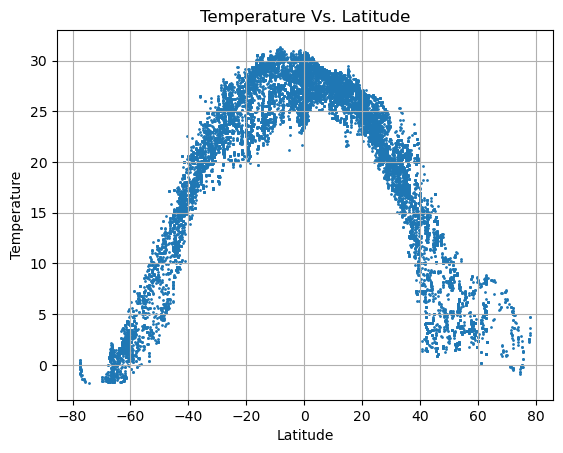

In [8]:
def plot_temp_vs_latitude():
    try:
        df_raw = pd.read_csv('data.csv')
    except:
        print("Importing data...")
        t0 = time.time()
        ArgoSet = argopy.DataFetcher().region([-180, 180, -90, 90, 0, 5, '2015-01', '2015-02'])
        print("Time to import : ", time.time() - t0)
        ds = ArgoSet.data.argo.point2profile().to_dataframe()
        print("Time to get data from DataFetcher : ", time.time() - t0)
        ds.to_csv('data.csv')

    # Remove rows where temp is None
    df = df_raw.dropna(subset=['TEMP'])

    # Define the variables to work with:
    temp = np.array(df['TEMP'])
    lat = np.array(df['LATITUDE'])

    # Scatter data and add grid
    plt.scatter(lat, temp, s=1)
    plt.grid(True)

    # Adding labels to the axes and title
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    plt.title('Temperature Vs. Latitude')

    # plt.savefig('figures/temp_vs_latitude.png')
    plt.show()

    return True


flag = False
while not flag:
    try:
        flag = plot_temp_vs_latitude()
    except:
        print("Argo Server Timeout Error : retrying")
        print("To exit, press ctrl+c 2x")
        time.sleep(2)

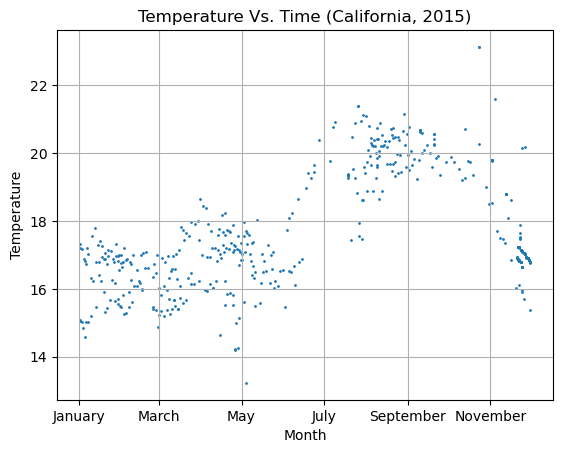

In [20]:
import time


def plot_temp_vs_time_CA():
    # Fetch data for California in 2015
    try:
        df_raw = pd.read_csv('data_CA_2015.csv')
    except:
        print("Importing data...")
        t0 = time.time()
        print("###")
        ArgoSet = argopy.DataFetcher().region([-124, -116, 32, 42, 0, 5, '2015-01', '2015-12'])
        print("Time to import : ", time.time() - t0)
        ds = ArgoSet.data.argo.point2profile().to_dataframe()
        print("Time to get data from DataFetcher : ", time.time() - t0)
        ds.to_csv('data_CA_2015.csv')
        # df_raw = pd.read_csv('data_CA_2015.csv')

    # Remove rows where temp is None
    df = df_raw.dropna(subset=['TEMP'])

    # Define the variables to work with:
    temp = np.array(df['TEMP'])
    time_strings = np.array(df['TIME'])

    # Assigns each datetime formatted time string to an array of datetime objects
    time = np.array([datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S') for time_string in time_strings])

    # Plots month name in x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

    # Scatter data and add grid
    plt.scatter(time, temp, s=1)
    plt.grid(True)

    # Title and labels
    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.title('Temperature Vs. Time (California, 2015)')

    # Save figure and show the plot
    # plt.savefig('figures/temp_vs_timeCA.png')
    plt.show()
    return True


flag = False
while not flag:
    try:
        flag = plot_temp_vs_time_CA()
    except:
        print("Argo Server Timeout Error : retrying")
        print("To exit, press ctrl+c 2x")
        time.sleep(2)

Starting task 1
Importing data...
Time to import :  0.003717184066772461
Time to get data from DataFetcher :  87.78725099563599
Time to convert :  0.06627511978149414
Plotting data...


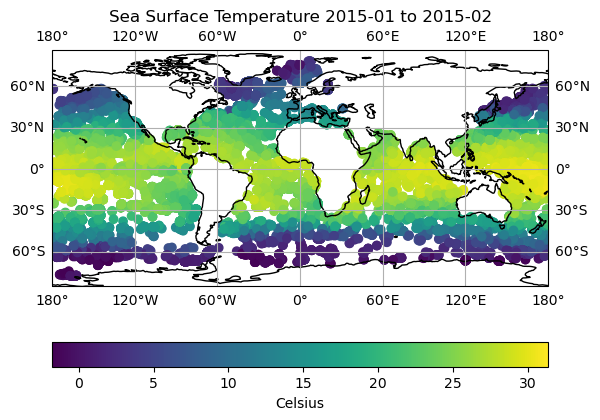

Starting task 2
Importing data...
Time to import :  0.003692150115966797
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


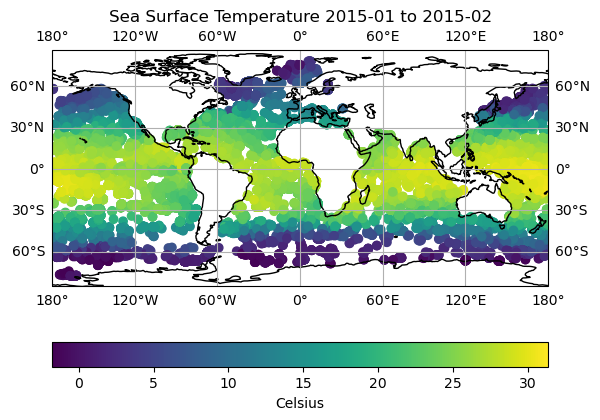

Starting task 2
Importing data...
Time to import :  0.0028412342071533203
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


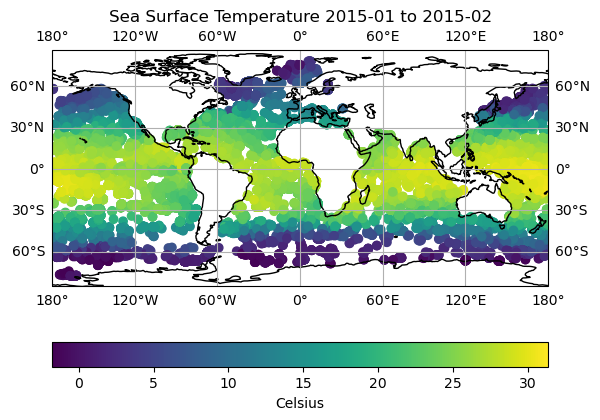

Starting task 2
Importing data...
Time to import :  0.0035431385040283203
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


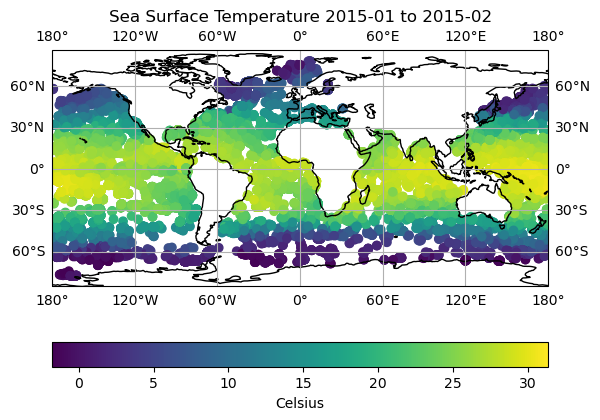

Starting task 2
Importing data...
Time to import :  0.004370212554931641
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


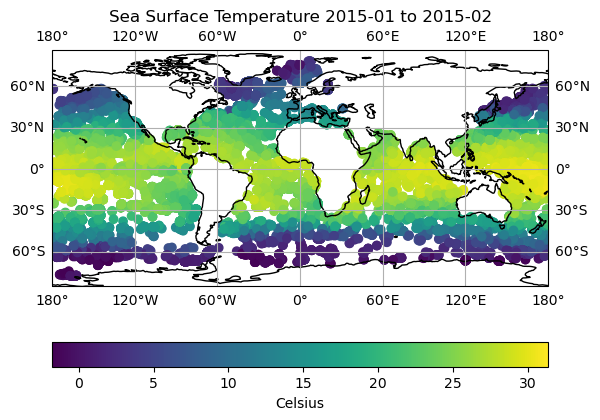

Starting task 2
Importing data...
Time to import :  0.007519721984863281
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


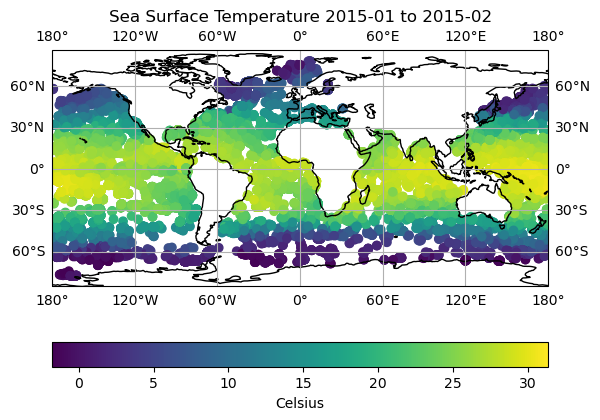

Starting task 2
Importing data...
Time to import :  0.00817108154296875
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


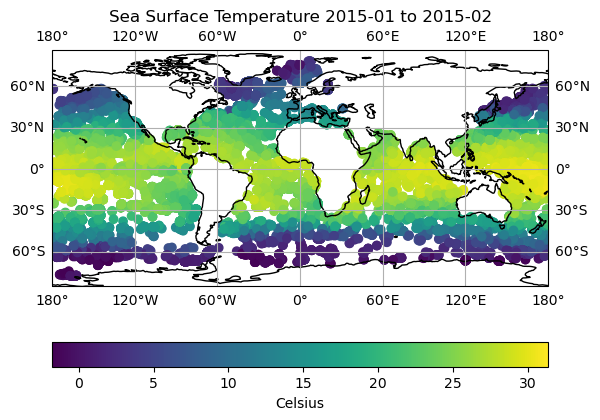

Starting task 2
Importing data...
Time to import :  0.0034279823303222656
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


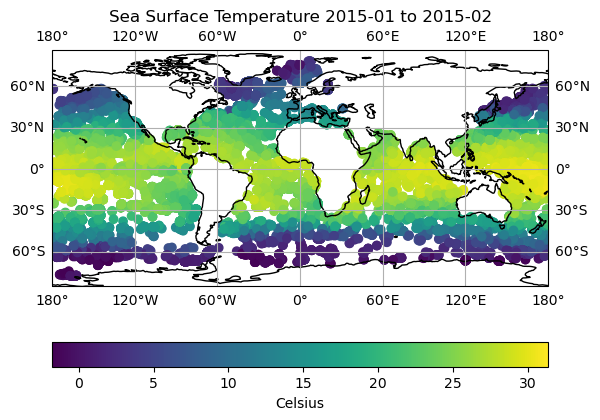

Starting task 2
Importing data...
Time to import :  0.0035266876220703125
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


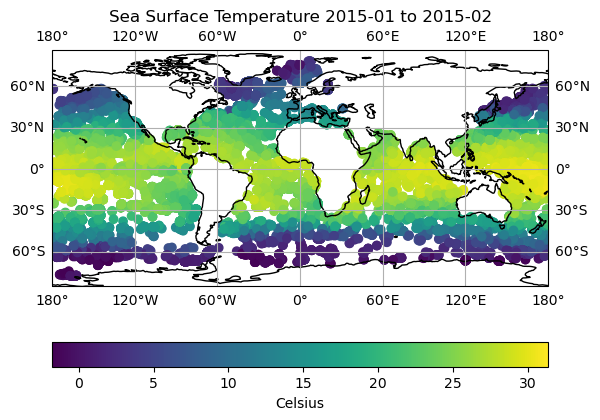

Starting task 2
Importing data...
Time to import :  0.0022780895233154297
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


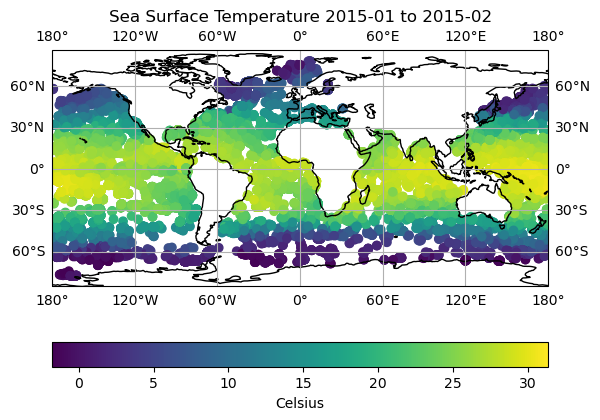

Starting task 2
Importing data...
Time to import :  0.004174947738647461
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


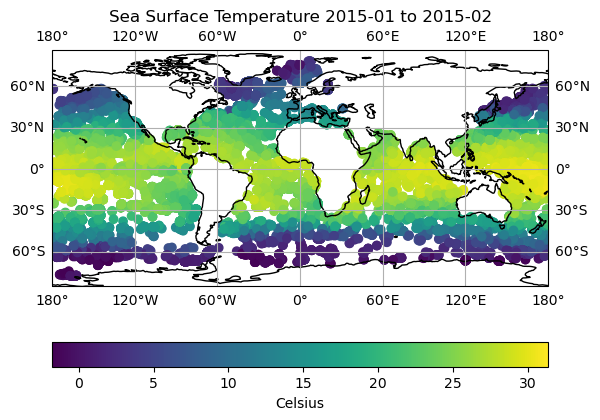

Starting task 2
Importing data...
Time to import :  0.010952949523925781
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


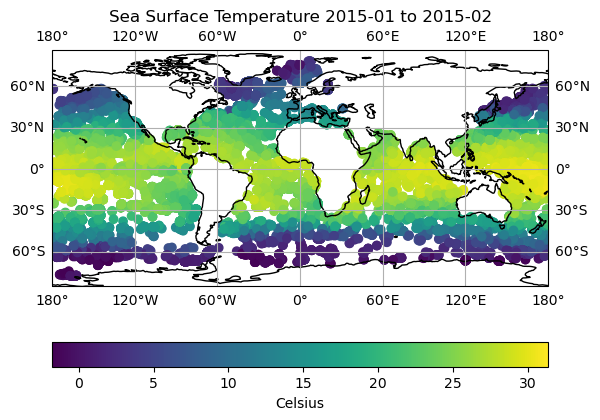

Starting task 2
Importing data...
Time to import :  0.002218961715698242
Time to get data from DataFetcher :  171.0186140537262
Time to convert :  0.24203968048095703
Plotting data...


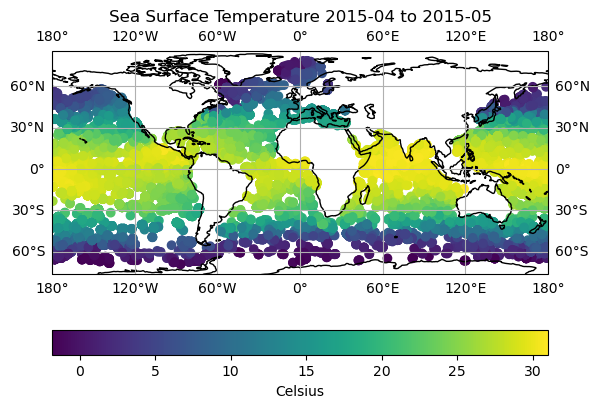

Starting task 3
Importing data...
Time to import :  0.0028181076049804688
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


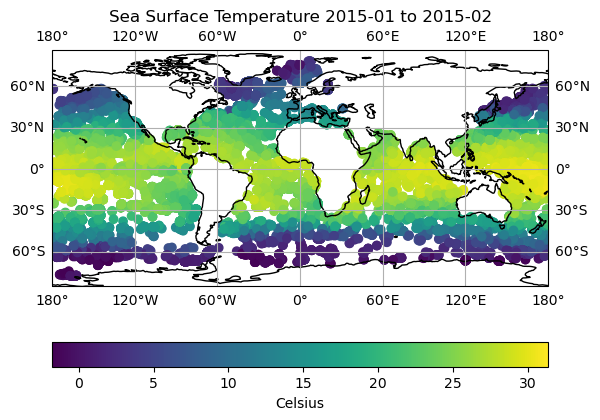

Starting task 2
Plotting data...


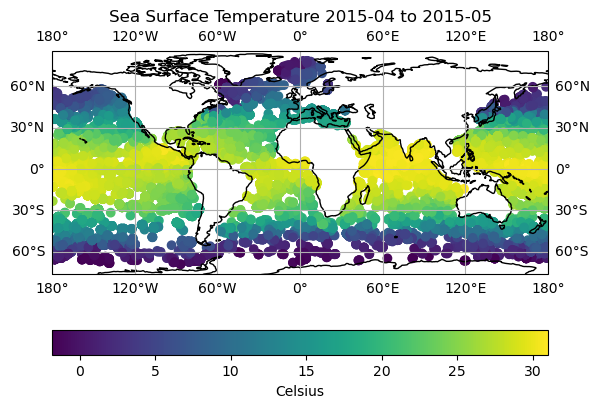

Starting task 3
Importing data...
Time to import :  0.0034339427947998047
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


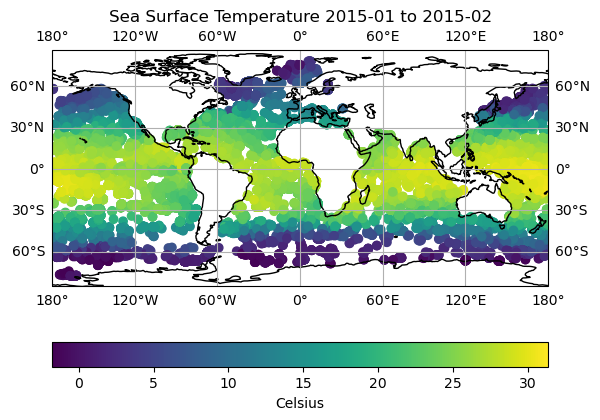

Starting task 2
Plotting data...


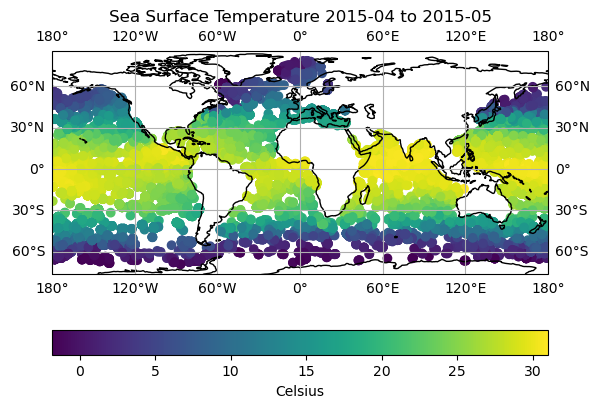

Starting task 3
Importing data...
Time to import :  0.002147674560546875
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


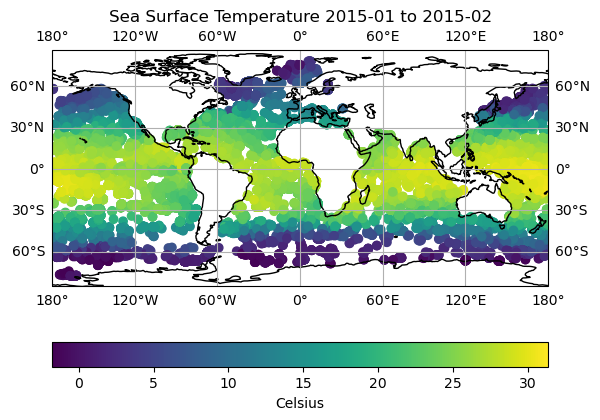

Starting task 2
Plotting data...


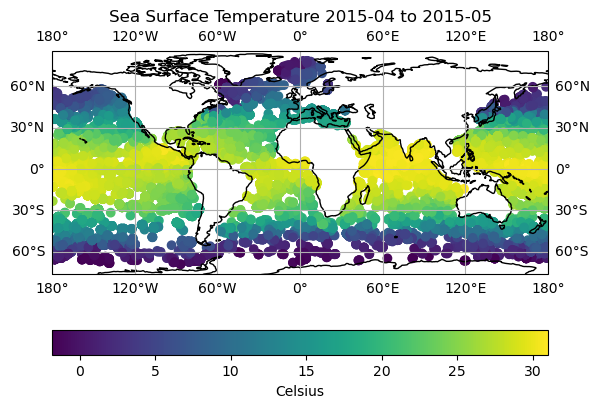

Starting task 3
Importing data...
Time to import :  0.0034041404724121094
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


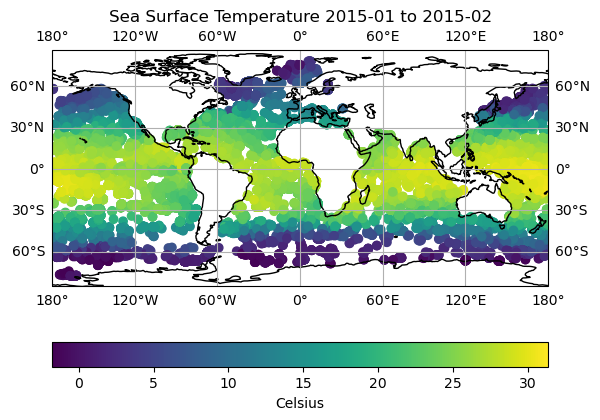

Starting task 2
Plotting data...


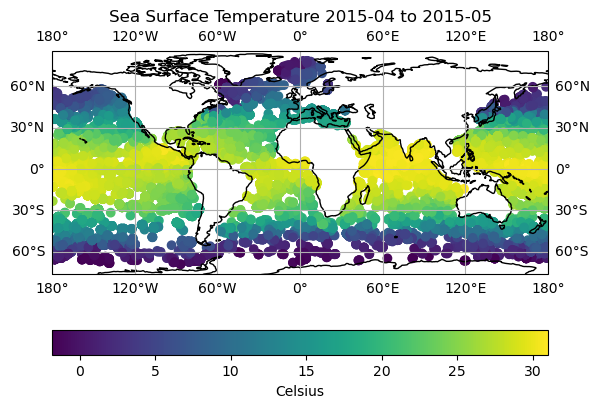

Starting task 3
Importing data...
Time to import :  0.004976987838745117
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


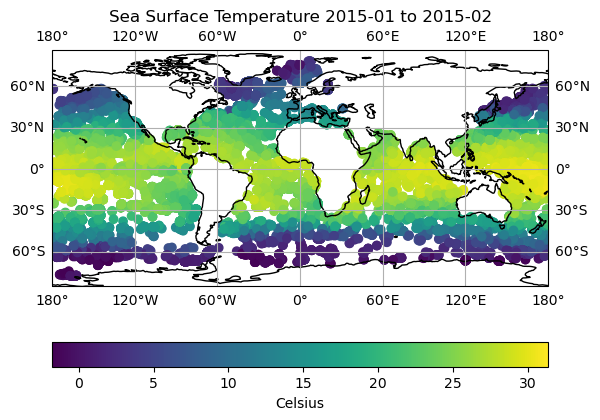

Starting task 2
Plotting data...


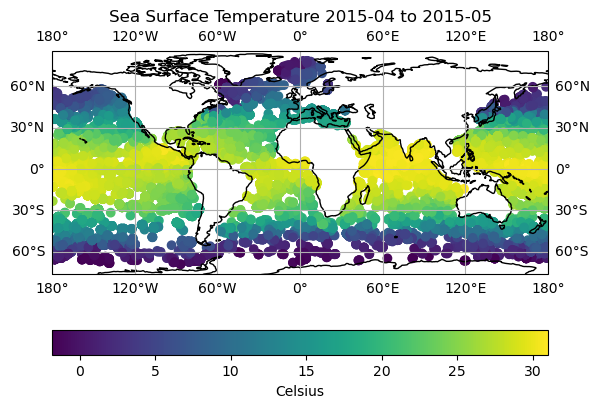

Starting task 3
Importing data...
Time to import :  0.0035829544067382812
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


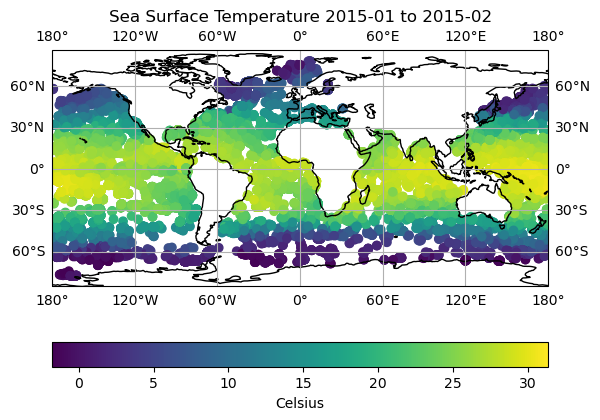

Starting task 2
Plotting data...


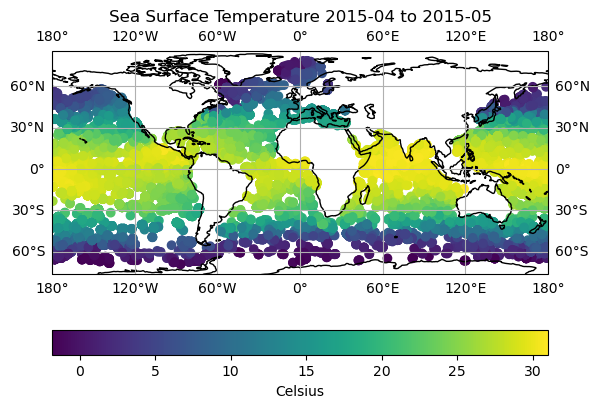

Starting task 3
Importing data...
Time to import :  0.007384777069091797
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


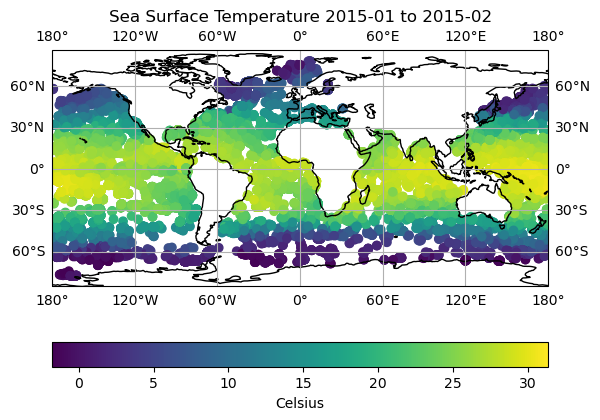

Starting task 2
Plotting data...


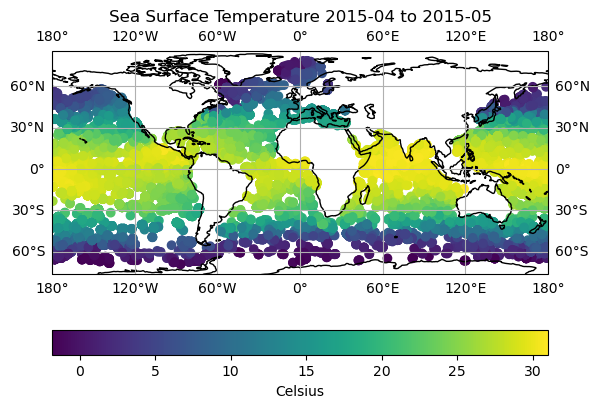

Starting task 3
Importing data...
Time to import :  0.0019867420196533203
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


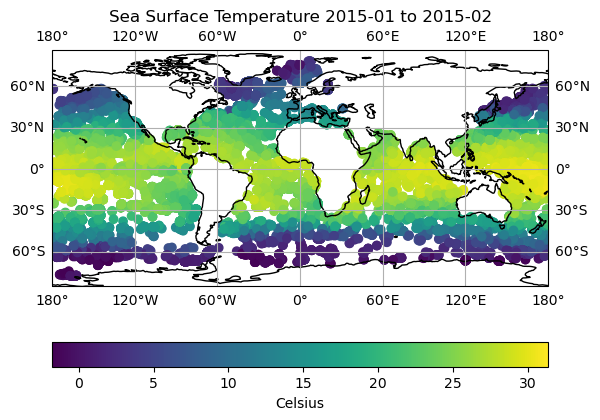

Starting task 2
Plotting data...


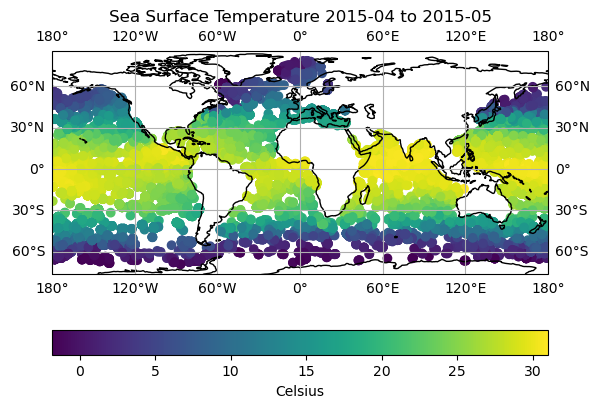

Starting task 3
Importing data...
Time to import :  0.00304412841796875
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


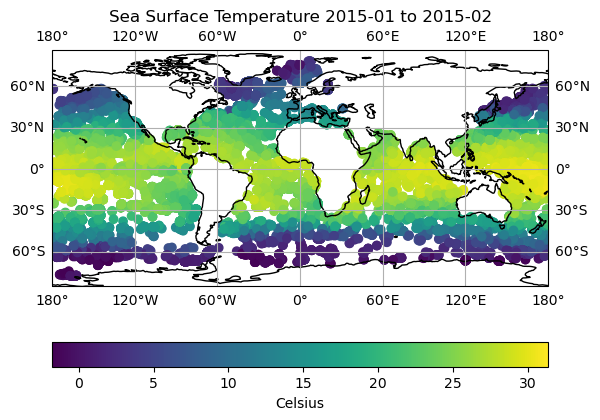

Starting task 2
Plotting data...


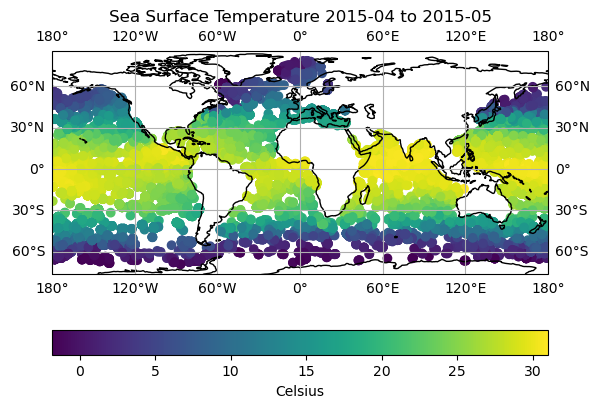

Starting task 3
Importing data...
Time to import :  0.002205371856689453
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


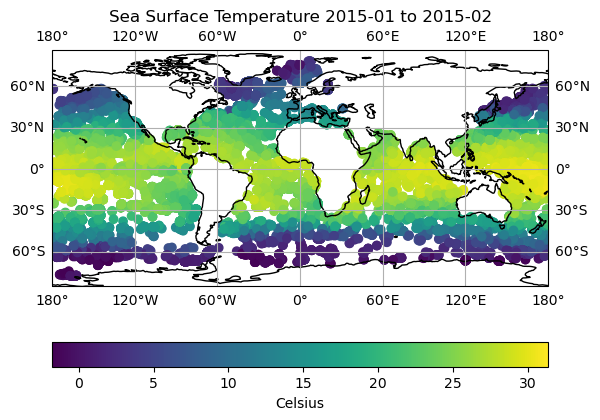

Starting task 2
Plotting data...


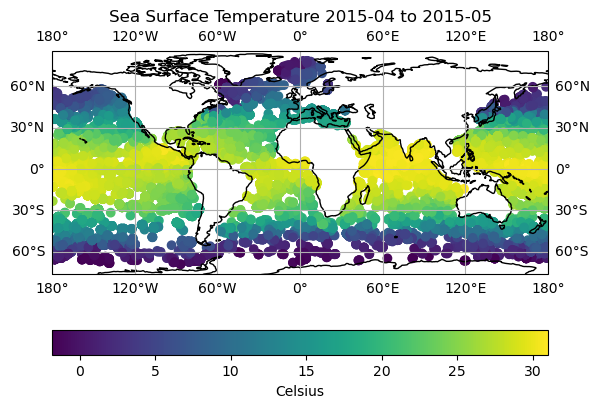

Starting task 3
Importing data...
Time to import :  0.0033750534057617188
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


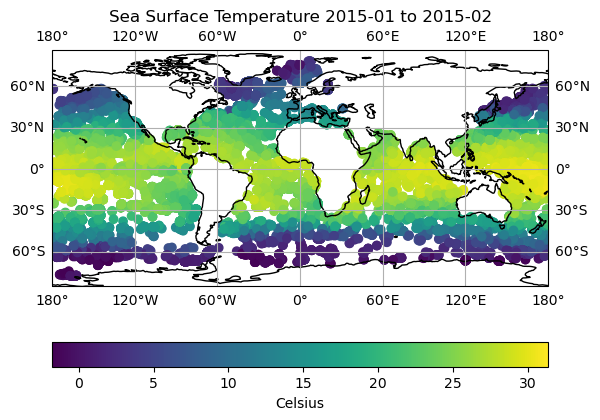

Starting task 2
Plotting data...


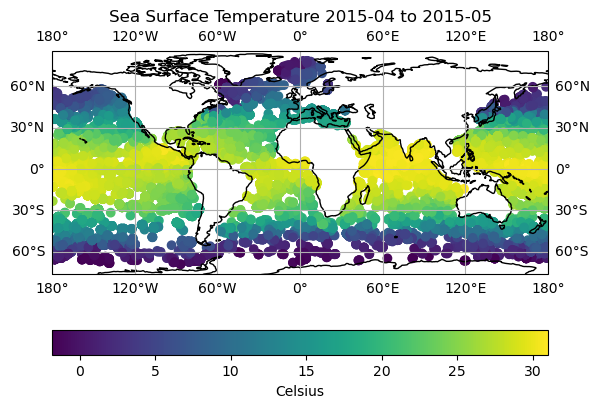

Starting task 3
Importing data...
Time to import :  0.0020890235900878906
Time to get data from DataFetcher :  100.9699010848999
Time to convert :  0.2485508918762207
Plotting data...


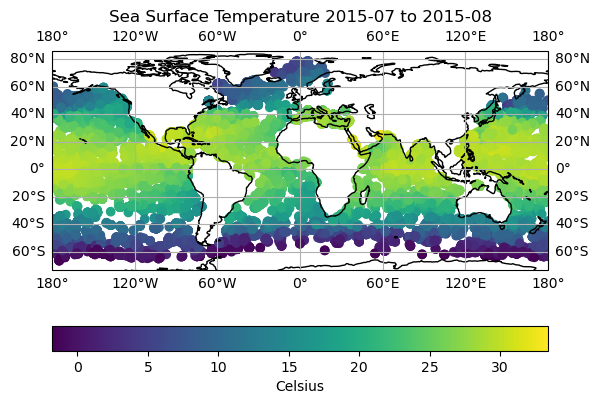

Starting task 4
Importing data...
Time to import :  0.01424407958984375
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


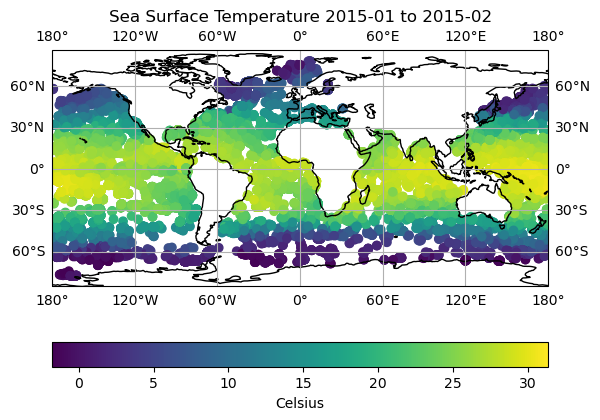

Starting task 2
Plotting data...


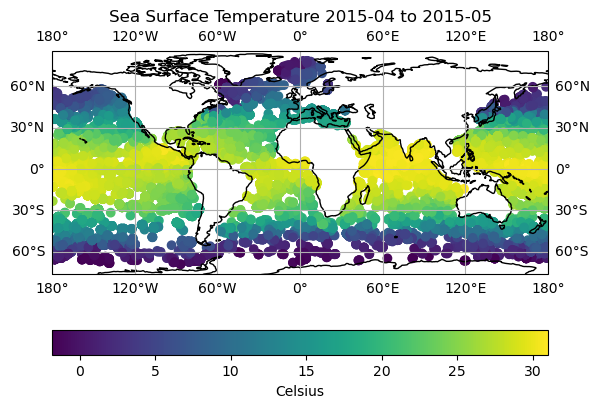

Starting task 3
Plotting data...


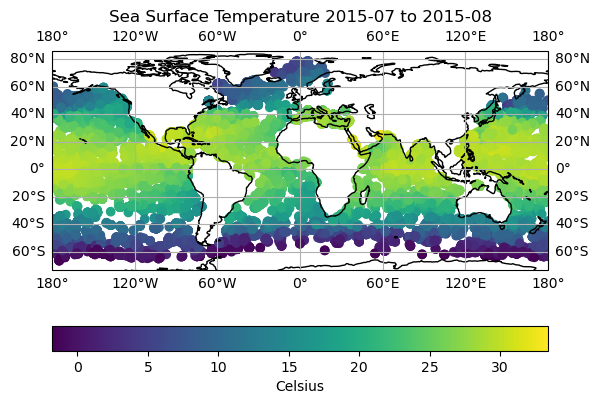

Starting task 4
Importing data...
Time to import :  0.016194820404052734
Argo Server Timeout Error : retrying
To exit, press ctrl+c 2x
Starting task 1
Plotting data...


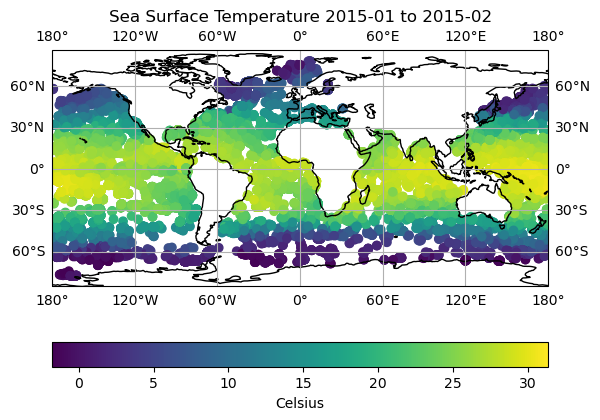

Starting task 2
Plotting data...


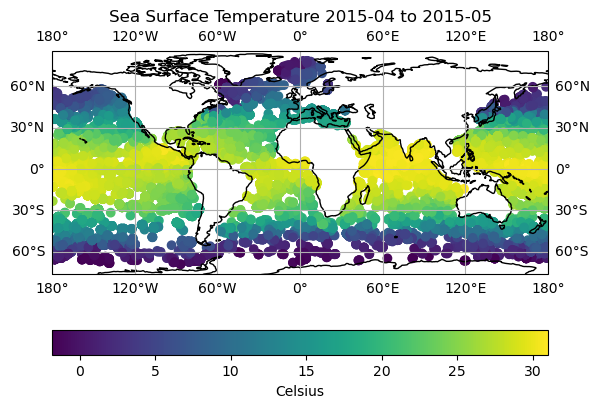

Starting task 3
Plotting data...


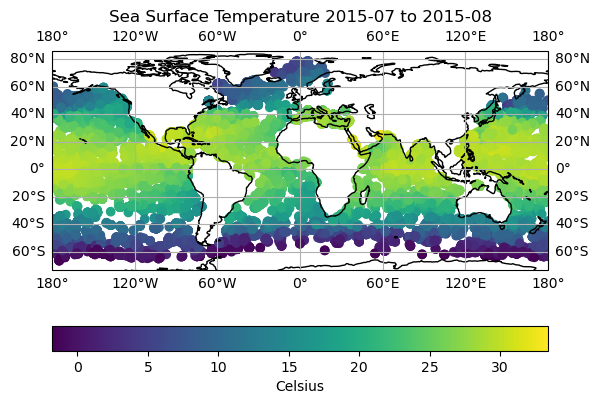

Starting task 4
Importing data...
Time to import :  0.002062082290649414


In [ ]:
import cartopy.crs as ccrs


dates_list = [['2015-01', '2015-02'], ['2015-04', '2015-05'], ['2015-07', '2015-08'], ['2015-10', '2015-11']]
argopy.set_options(src='erddap', dataset='phy', mode='standard')


def plot_data() :
    for i, dates in enumerate(dates_list) :

        file = 'data'+str(i+1)+'.csv'

        print("Starting task " + str(i+1))

        try :
            df = pd.read_csv(file)
        except :
            print("Importing data...")
            t0 = time.time()
            ArgoSet = argopy.DataFetcher().region([-180,180,-90,90, 0, 5] + dates)
            split = time.time()-t0
            print("Time to import : ", split)
            t0 = time.time()
            ds = ArgoSet.data.argo.point2profile()
            split = time.time()-t0
            print("Time to get data from DataFetcher : ", split)
            t0 = time.time()
            df = ds.to_dataframe()
            split = time.time()-t0
            print("Time to convert : ", split)
            df.to_csv(file) 

        # Define the variables to work with:
        temp = np.array(df['TEMP'])
        lat = np.array(df['LATITUDE'])
        long = np.array(df['LONGITUDE'])

        print("Plotting data...")

        fig = plt.figure()
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines()
        global_temp = ax.scatter(long, lat, c=temp)

        # title and label :
        cbar = fig.colorbar(global_temp, location='bottom')
        cbar.set_label('Celsius')
        ax.set_title('Sea Surface Temperature' + ' ' + dates[0] + ' to ' + dates[1])
        gridlines = ax.gridlines(draw_labels=True) # shows lat/long
        plt.show()
    
    return True


flag = False
while not flag :
    try : 
        flag = plot_data()
    except :
        print("Argo Server Timeout Error : retrying")
        print("To exit, press ctrl+c 2x")
        time.sleep(2)

In [ ]:
import cartopy.feature as cfeature
from scipy.interpolate import make_interp_spline
from scipy.special import comb


def bezier_curve(x_points, y_points, num=200):
    """
    Make a smooth curve based on the given points
    :param x_points: x coordinates
    :param y_points: y coordinates
    :param num: number of points on the smooth curve
    :return: list of points that sketches the curve
    """
    n = len(x_points) - 1
    if num <= n:
        num = n+1
    t = np.linspace(0.0, 1.0, num=num)
    curve = np.zeros((num, 2))
    for i, tt in enumerate(t):
        x_curve = sum(comb(n, j) * (1 - tt) ** (n - j) * tt ** j * x_points[j] for j in range(n + 1))
        y_curve = sum(comb(n, j) * (1 - tt) ** (n - j) * tt ** j * y_points[j] for j in range(n + 1))
        curve[i] = [x_curve, y_curve]
    return curve


def plot_currents(min_lon, max_lon, min_lat, max_lat, min_depth, max_depth,
                  start_date, end_date, data_file=None, current_count=100):
    """
    Plot the currents from the bouy displacement data.
    data_file is optional, but it is recommended to use local data or save
    the remote data to local files for a better stability.
    :param min_lon: minimum longitude of interested region, from -180 to 180
    :param max_lon: maximum longitude of interested region, from -180 to 180
    :param min_lat: minimum latitude of interested region, from -90 to 90
    :param max_lat: maximum latitude of interested region, from -90 to 90
    :param min_depth: minimum depth of interested region, from 0 to 100
    :param max_depth: maximum depth of interested region, from 0 to 100
    :param start_date: start date of interested period, e.g. "2015-06", "2015-01-07"
    :param end_date: end date of interested period, e.g. "2015-06", "2015-01-07"
    :param data_file: local bouy data used for analysis (optinal), e.g. "data.csv"
    :param current_count: number of currents to be plotted
    """
    df = pd.DataFrame()
    if data_file is not None:
        df = pd.read_csv(data_file)
    else:
        import argopy
        f = argopy.DataFetcher()
        count = 0
        while count <= 100:
            try:
                f = f.region([min_lon, max_lon, min_lat, max_lat, min_depth, max_depth, start_date, end_date])
                df = f.data.to_dataframe()
                # df.to_csv('data.csv', index=False)
                break
            except:
                count += 1
    new_df = df[['PLATFORM_NUMBER','LONGITUDE','LATITUDE','TEMP']]
    df = new_df
    grouped_df = df.groupby('PLATFORM_NUMBER')
    dataframes_by_id = [group for _, group in grouped_df]

    scales = []
    for single in dataframes_by_id:
        val = 0
        val += abs(single['LONGITUDE'].iloc[-1]-single['LONGITUDE'].iloc[0])
        val += abs(single['LATITUDE'].iloc[-1] - single['LATITUDE'].iloc[0])
        if val >= 100 or single['LATITUDE'].max()-single['LATITUDE'].min()>90:
            val = 0
        scales.append(val)

    max_indices = sorted(range(len(scales)), key=lambda i: scales[i], reverse=True)[:current_count]
    dfs_to_be_plot = [dataframes_by_id[i] for i in max_indices]

    fig = plt.figure(figsize=(36,18))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, color='lightgray')
    ax.set_xlim([min_lon, max_lon])
    ax.set_ylim([min_lat, max_lat])
    ax.set_xlabel('Longitude', fontsize=12, labelpad=10)
    ax.set_ylabel('Latitude', fontsize=12, labelpad=10)
    fig.suptitle('Currents extracted from bouy displacement data', fontsize=14)
    cmap = plt.get_cmap('coolwarm')
    for single in dfs_to_be_plot:
        print(single)
        lon = single['LONGITUDE'].tolist()
        lat = single['LATITUDE'].tolist()
        dif = len(lon) // 100 + 1
        lon = lon[::dif]
        lat = lat[::dif]
        curve = bezier_curve(lon, lat)
        ax.plot(curve[:, 0], curve[:, 1], color=cmap(single['TEMP'].mean()/20.0))
        vl = single['TEMP'].mean()/20.0
        if vl > 0.5:
            cl = 'red'
        else:
            cl = 'blue'
        ax.arrow(lon[-1], lat[-1], (lon[-1]-lon[0])/10, (lat[-1]-lat[0])/10, length_includes_head=True, head_width=0.7, head_length=1, fc=cl, ec=cl)

    ax.set_xticks(np.arange(min_lon, max_lon+1, (max_lon-min_lon)/10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(min_lat, max_lat+1, (max_lat-min_lat)/10), crs=ccrs.PlateCarree())

    fig.show()


plot_currents(-180,180,-90,90,0,10,'2015-01','2015-06',current_count=700)
plot_currents(-180,180,-90,90,0,10,'2015-07','2015-12',current_count=700)
